<a href="https://colab.research.google.com/github/Yassmine-Yazidi-573/AI-Powered-M-E-Platform---Art-Rue/blob/main/Survival_Analysis_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install lifelines

In [2]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.0/350.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=a51f938e019b2be79b64128eeb7f3536ba43e143a7a52f54adc128dec9e66a52
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [19]:
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [20]:
df=pd.read_excel('Data.xlsx')
df.head()

,Startup,Acceleration year,founder_age,business_knowledge,diaspora,cofounders_nb,family_related,female_founder,full_activity,kids,...,uni_excellent,uni_good_very_good,industry_services_manufacturing,past_accelerator,product_category,recommended,Failure Year,Last Observation,T= years until failure,Event
0,Dabchy,2018,30.0,0,1,3,0,1,1,0,...,1,0,1,1,1,0,—,2025,7,0
1,Echo,2018,32.0,0,0,1,0,0,1,0,...,0,1,1,0,0,1,—,2025,7,0
2,Naviacom,2018,32.5,0,0,2,0,0,1,1,...,0,1,0,0,1,0,2020,2020,2,1
3,Vynd,2018,27.5,1,0,2,0,0,1,0,...,0,0,1,1,1,0,2020,2020,2,1
4,Wattnow,2018,30.0,0,0,1,0,0,1,0,...,0,1,0,1,1,0,—,2025,7,0


In [21]:
df.columns

Index(['Startup', 'Acceleration year', 'founder_age', 'business_knowledge',
       'diaspora', 'cofounders_nb', 'family_related', 'female_founder',
       'full_activity', 'kids', 'marital_status', 'nby_education',
       'founder's_network_size', 'past_working', 'repeat_founders',
       'same_nationality', 'technical_knowledge', 'uni_excellent',
       'uni_good_very_good', 'industry_services_manufacturing',
       'past_accelerator', 'product_category', 'recommended', 'Failure Year',
       'Last Observation', 'T= years until failure', 'Event'],
      dtype='object')

### **Exploratory Survival Analysis**

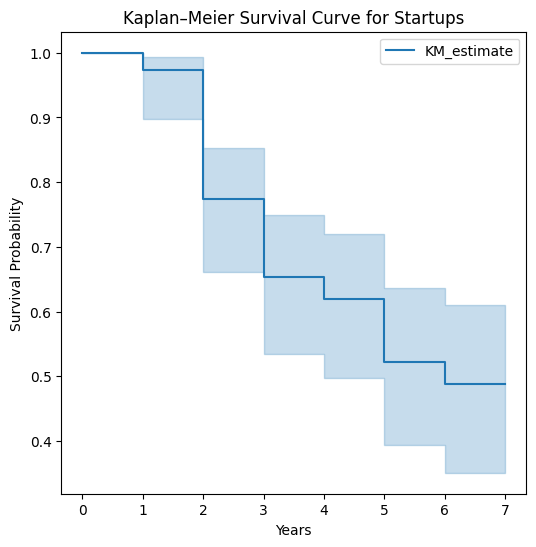

In [22]:
from matplotlib import colors
kmf = KaplanMeierFitter()

kmf.fit(
    durations=df["T= years until failure"],
    event_observed=df["Event"]
)
plt.figure(figsize=(6,6))

kmf.plot_survival_function(ci_show=True)

plt.title("Kaplan–Meier Survival Curve for Startups")
plt.xlabel("Years")
plt.ylabel("Survival Probability")

plt.show()

In [23]:
median_survival = kmf.median_survival_time_
print("Median Survival Time:", median_survival)

Median Survival Time: 6.0


The Kaplan–Meier curve shows that startup survival declines sharply in the first years following acceleration. The estimated median survival time is 6 years, indicating that half of the startups fail within approximately 6 years after acceleration.
==> The portfolio has relatively resilient startups.

In [24]:
print("Confidence Interval for Survival Function:")
display(kmf.confidence_interval_survival_function_)

Confidence Interval for Survival Function:


,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
1.0,0.897558,0.993263
2.0,0.660986,0.852497
3.0,0.534191,0.749024
4.0,0.496712,0.719715
5.0,0.393706,0.635882
6.0,0.350824,0.610778
7.0,0.350824,0.610778


The shaded region is wide at later years ==> Confidence Interval becomes wider.
Reasons:


*   Few startups remain at risk at long horizons.
*   Small sample size : 75 startups.



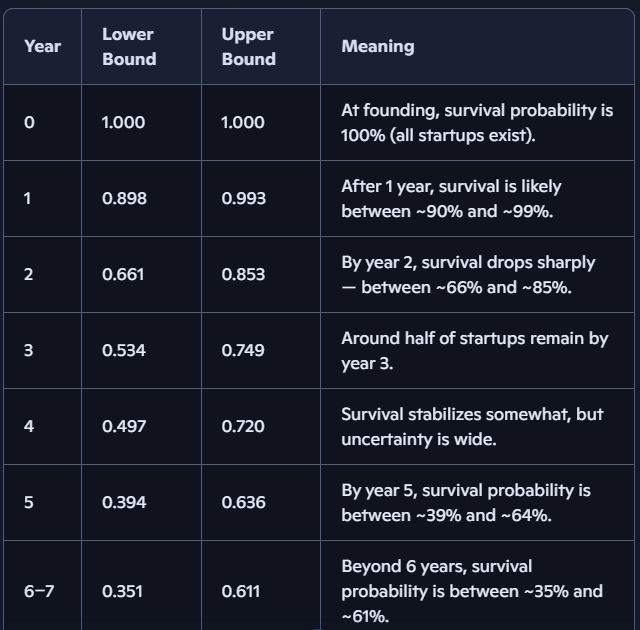

At 6 years, the survival probability is estimated at ~48%, with a 95% confidence interval ranging from ~35% to ~61%

### **Comparing Survival by Founder Characteristics**

In [25]:
df["Experience_group"] = df["past_working"].apply(
    lambda x: "High" if x >= df["past_working"].median() else "Low"
)


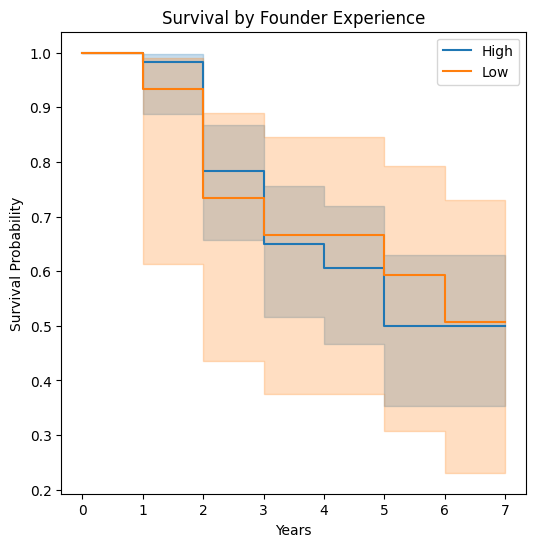

In [26]:
kmf2 = KaplanMeierFitter()

plt.figure(figsize=(6,6))

for group in df["Experience_group"].unique():
    mask = df["Experience_group"] == group

    kmf2.fit(
        durations=df[mask]["T= years until failure"],
        event_observed=df[mask]["Event"],
        label=group
    )

    kmf2.plot_survival_function()

plt.title("Survival by Founder Experience")
plt.xlabel("Years")
plt.ylabel("Survival Probability")

plt.show()

In [27]:
from lifelines.statistics import logrank_test

group1 = df[df["Experience_group"] == "High"]
group2 = df[df["Experience_group"] == "Low"]

results = logrank_test(
    group1["T= years until failure"],
    group2["T= years until failure"],
    event_observed_A=group1["Event"],
    event_observed_B=group2["Event"]
)

print(results)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.02 0.88      0.18


The Kaplan–Meier survival curves for startups led by founders with high versus low experience show substantial overlap throughout the observation period. The log-rank test indicates no statistically significant difference in survival distributions between the two groups (χ² = 0.02, p = 0.88). These results suggest that founder experience, when considered alone, does not significantly influence startup survival within the analyzed portfolio.
*   KM is for univariate analysis
*   COX : is for multivariate analysis

 Cox Proportional Hazards Model (CPH) answers : Which factors increase or decrease the risk of startup failure over time?

Unlike Kaplan–Meier (one variable at a time), Cox analyzes all variables simultaneously.

In [34]:
df=df.drop(columns=['Startup', 'Acceleration year','Failure Year','Last Observation','Experience_group'])

exp(coef) is the Hazard Ratio ==> column of concern

In [35]:
cph = CoxPHFitter()
cph.fit(
    df,
    duration_col="T= years until failure",
    event_col="Event"
)
cph.print_summary()

/usr/local/lib/python3.12/dist-packages/lifelines/utils/__init__.py:1120: ConvergenceWarning: Column uni_excellent have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Event'].astype(bool)
>>> print(df.loc[events, 'uni_excellent'].var())
>>> print(df.loc[~events, 'uni_excellent'].var())

A very low variance means that the column uni_excellent completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/usr/local/lib/python3.12/dist-packages/lifelines/fitters/coxph_fitter.py:1607: ConvergenceWarning: Newton-Raphson convergence completed successfully but norm(delta) is still high, 0.273. This may imply non-unique solutions to the maximum likelihood. Perhaps there is collinearity or 

<lifelines.CoxPHFitter: fitted with 75 total observations, 41 right-censored observations>
             duration col = 'T= years until failure'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 75
number of events observed = 34
   partial log-likelihood = -102.74
         time fit was run = 2026-02-14 15:58:15 UTC

---
                                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                         
founder_age                      -0.04      0.96      0.05           -0.15            0.06                0.86                1.06
business_knowledge               -0.61      0.55      0.62           -1.82            0.61                0.16                1.84
diaspora                          0.61      1.84      0.49           -0.35            1.57                0.71                4.80
cofounders_nb                    -0.63      0.53      0.32           -1.25           -0.00                0.29                1.00
family_related                   -1.51      0.22      1.01           -3.48            0.47                0.03                1.59
female_founder                   -1.17      0.31      0.70           -2.54            0.20                0.08                1.22
full_activity                    -0.23      0.80      0.51           -1.22            0.77                0.30                2.16
kids                             -0.23      0.79      0.64           -1.49            1.02                0.23                2.77
marital_status                    0.42      1.52      0.64           -0.83            1.67                0.44                5.32
nby_education                     0.17      1.19      0.23           -0.28            0.63                0.76                1.87
founder's_network_size           -4.31      0.01      0.98           -6.22           -2.39                0.00                0.09
past_working                      0.86      2.36      0.62           -0.36            2.08                0.69                8.04
repeat_founders                  -1.84      0.16      0.82           -3.45           -0.23                0.03                0.80
same_nationality                 -2.39      0.09      1.19           -4.72           -0.07                0.01                0.94
technical_knowledge               0.12      1.13      0.67           -1.20            1.44                0.30                4.22
uni_excellent                   -16.16      0.00   2302.42        -4528.82         4496.50                0.00                 inf
uni_good_very_good               -0.96      0.38      0.54           -2.01            0.10                0.13                1.10
industry_services_manufacturing  -2.12      0.12      0.93           -3.94           -0.30                0.02                0.74
past_accelerator                 -0.61      0.54      0.58           -1.74            0.52                0.18                1.68
product_category                  0.30      1.35      0.50           -0.67            1.28                0.51                3.59
recommended                      -0.28      0.75      0.48           -1.23            0.66                0.29                1.93

                                 cmp to     z      p  -log2(p)
covariate                                                     
founder_age                        0.00 -0.82   0.41      1.27
business_knowledge                 0.00 -0.98   0.33      1.60
diaspora                           0.00  1.25   0.21      2.24
cofounders_nb                      0.00 -1.97   0.05      4.35
family_related                     0.00 -1.50   0.13      2.90
female_founder                     0.00 -1.67   0.09      3.41
full_activity                      0.00 -0.44   0.66      0.61
kids                               0.00 -0.37   

uni_excellent: a  bit strange result : high std error!
Main findings:

*   founder's network size , has lowest p value, most significant indicator for survival.
*   repeat founders second most significant indicator

Interpretation:
*   Larger founder networks dramatically reduce failure risk
*   founders who opened startups before are much less likely to fail.

HR results:

*   HR = 0.01 → about 99% lower risk
*  HR = 0.16 → about 84% lower risk











The Cox proportional hazards model reveals that founder social capital plays a dominant role in startup survival. Founder network size is the strongest predictor, significantly reducing failure risk. Serial founders also demonstrate significantly higher survival probabilities. In contrast, traditional human capital variables such as age, education, and technical expertise show no significant effects when controlling for other factors.

In [36]:
cph.check_assumptions(df)

Proportional hazard assumption looks okay.


[]